In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RawData = pd.read_csv('Lincoln.met', index_col= False, sep = '\t', names =['Year','Day','MinT','MaxT','Rain','Radn','Wind','vp'])
RawData.set_index(['Year','Day'],inplace=True)
RawData.where(RawData>-90,np.nan,inplace=True)

In [3]:
CleanData = RawData.copy()
CleanData.ix[:,'MinT'].where(CleanData.ix[:,'MinT']>-10,-99,inplace=True)
CleanData.ix[:,'MaxT'].where(CleanData.ix[:,'MaxT']<35,-99,inplace=True)
CleanData.ix[:,'Rain'].where(CleanData.ix[:,'Rain']<200,-99,inplace=True)
CleanData.ix[:,'Radn'].where(CleanData.ix[:,'Radn']<35,-99,inplace=True)
CleanData.ix[:,'Wind'].where(CleanData.ix[:,'Wind']<2000,-99,inplace=True)
CleanData.ix[:,'vp'].where(CleanData.ix[:,'vp']<30,-99,inplace=True)

In [4]:
CleanData.to_csv('LincolnClean.met',sep='\t')

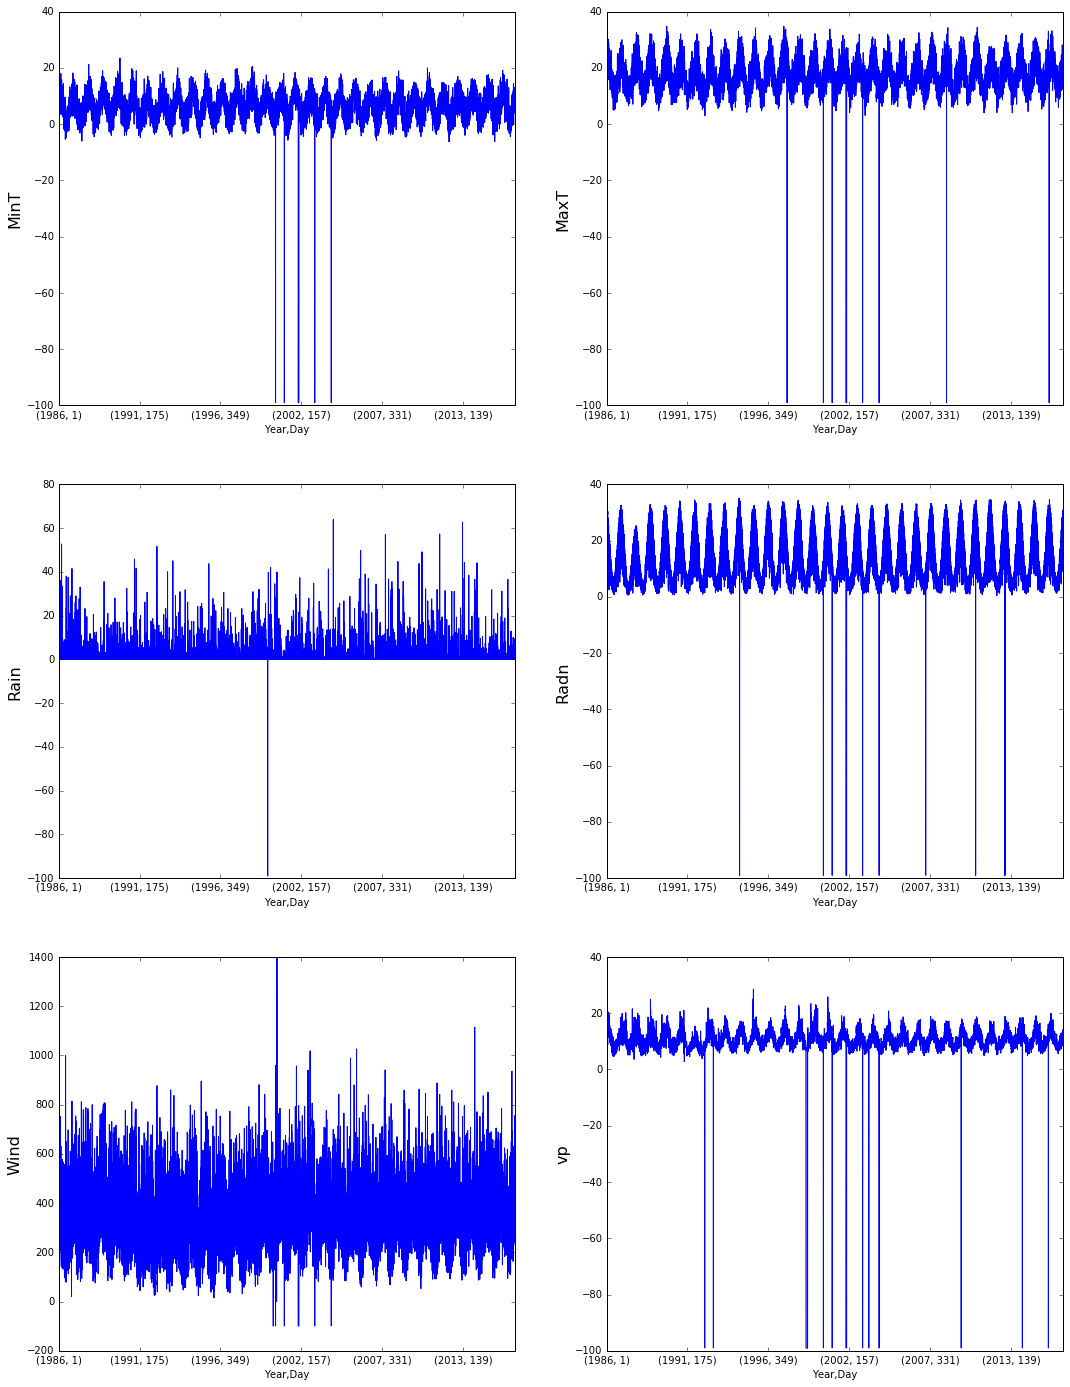

In [10]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in CleanData.columns:
    Fig.add_subplot(3,2,Position)
    CleanData.ix[:,x].plot()
    plt.ylabel(x,fontsize = 16)
    Position +=1

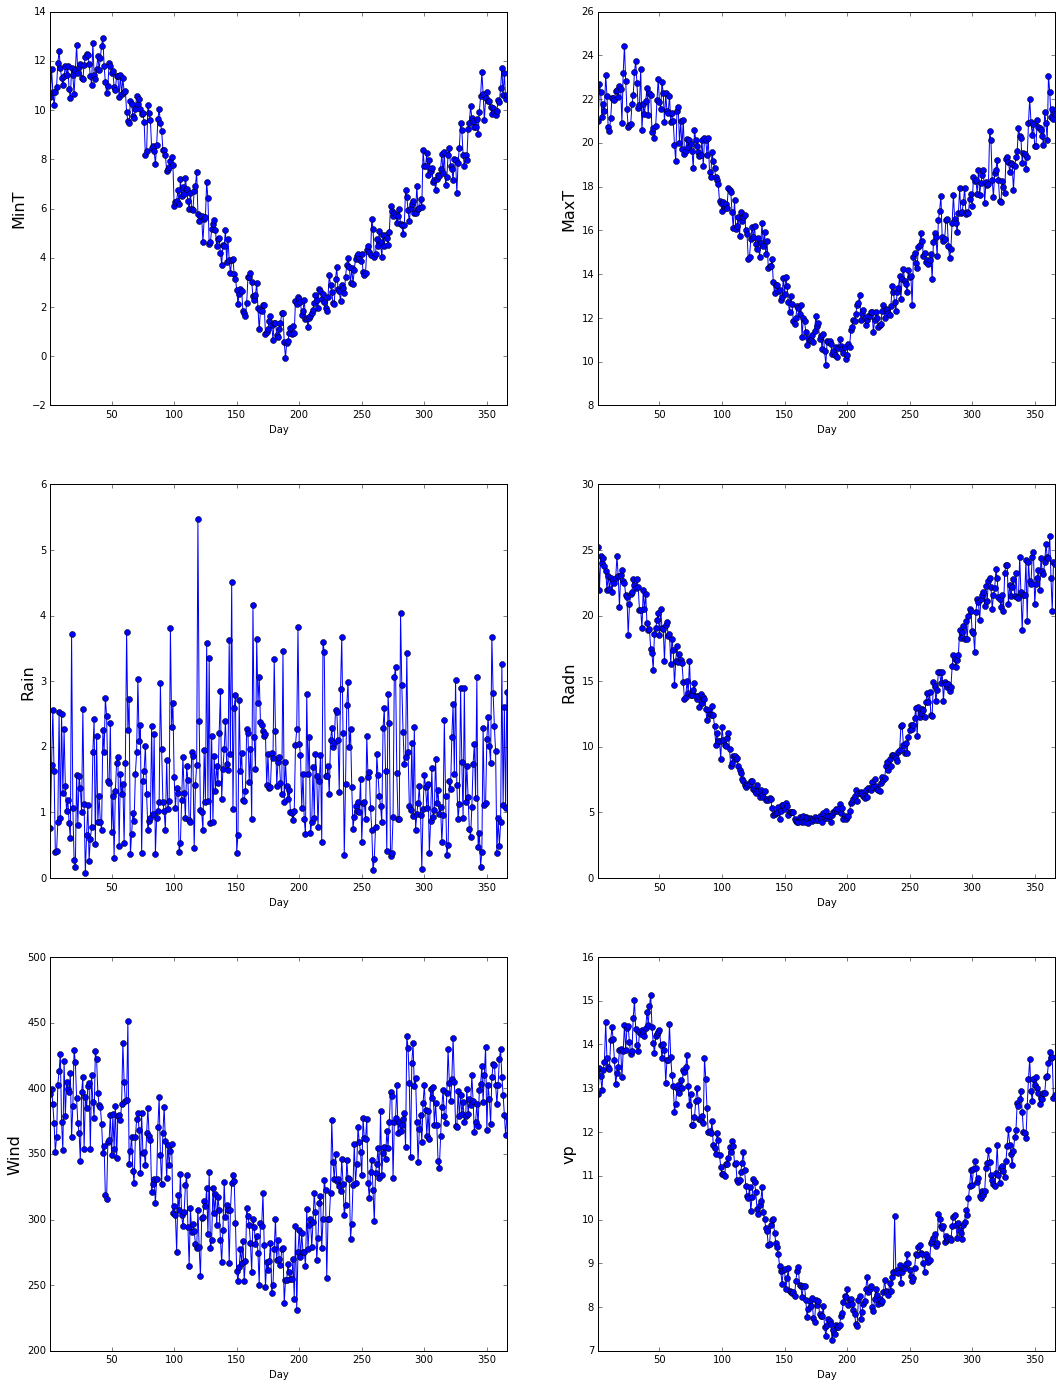

In [6]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in RawData.columns:
    Fig.add_subplot(3,2,Position)
    Means = RawData.groupby(level='Day').mean()
    Means.ix[:,x].plot(marker='o')
    plt.ylabel(x,fontsize = 16)
    Position +=1

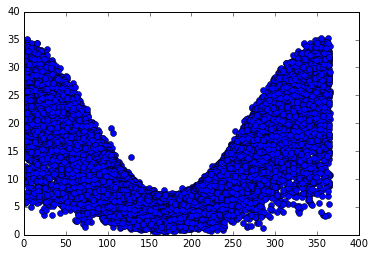

In [7]:
DayIndexed = RawData.copy()
DayIndexed.index = DayIndexed.index.droplevel('Year')
plt.plot(DayIndexed.index,DayIndexed.ix[:,'Radn'],'o')
